###Imports

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Using TensorFlow backend.


In [0]:
from tensorflow.keras.datasets.cifar10 import load_data

### Data Examination

In [0]:
# CIFAR has 10 classes like horses, boats, cats ...
dataset_size = 10000
(inps,labs), (tinps,tlabs) = load_data()
inps = inps[:dataset_size]
labs = labs[:dataset_size]

170500096/170498071 [==============================] - 14s 0us/step


In [0]:
labs = keras.utils.to_categorical(labs,10)
tlabs = keras.utils.to_categorical(tlabs,10)

In [0]:
print(np.shape(inps),np.shape(labs))

(10000, 32, 32, 3) (10000, 1)


[6]


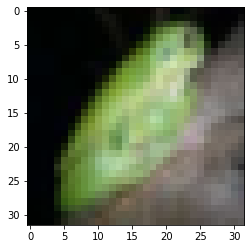

In [0]:
indx = int(random.random()*dataset_size)
plt.imshow(inps[indx])
print(labs[indx])

In [0]:
print(np.amax(inps[0]),np.amin(inps[0]))

255 0


### Network

In [0]:
# We use keras sequential API here
# It provides easy development, but we cannot use/manipulate the latent variables manually, the outputs between layers.
# To do that, either use keras functional API or pytorch

from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten, MaxPool2D
from keras.models import Sequential

inzNet = Sequential()

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(64,(5,5),activation = 'tanh', padding = 'same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(128,(5,5),activation = 'tanh', padding = 'same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(256,(5,5),activation = 'tanh', padding = 'same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(Flatten())
inzNet.add(Dense(10,activation = 'softmax'))

In [0]:
# just like functional API, optimizer and compile
from keras.optimizers import Adam
opt = Adam(lr = 0.001)
inzNet.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [0]:
# Remember, if training loss goes down, it only means we are FITTING to the training set
# It does not tell if we are fitting correctly, if we are underfitting or if we are overfitting
# for that, check val loss

# When you run this several times, it might take validation sets differently (check this from internet)
inzNet.fit(inps,labs,batch_size=100, epochs = 10 , validation_split = 0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 10s 1ms/step - loss: 1.9526 - accuracy: 0.3631 - val_loss: 1.7948 - val_accuracy: 0.3920
Epoch 2/10
9000/9000 [==============================] - 2s 219us/step - loss: 1.5314 - accuracy: 0.4757 - val_loss: 1.5830 - val_accuracy: 0.4790
Epoch 3/10
9000/9000 [==============================] - 2s 217us/step - loss: 1.2710 - accuracy: 0.5562 - val_loss: 1.5506 - val_accuracy: 0.4780
Epoch 4/10
9000/9000 [==============================] - 2s 220us/step - loss: 1.0583 - accuracy: 0.6264 - val_loss: 1.3324 - val_accuracy: 0.5350
Epoch 5/10
9000/9000 [==============================] - 2s 220us/step - loss: 0.9059 - accuracy: 0.6806 - val_loss: 1.2819 - val_accuracy: 0.5560
Epoch 6/10
9000/9000 [==============================] - 2s 222us/step - loss: 0.7631 - accuracy: 0.7278 - val_loss: 1.2413 - val_accuracy: 0.5800
Epoch 7/10
9000/9000 [==============================] - 2s 220us/step - loss:

In [0]:
inzNet.evaluate(tinps,tlabs)

10000/10000 [==============================] - 2s 163us/step


[1.3076277669906615, 0.6000999808311462]

4
3


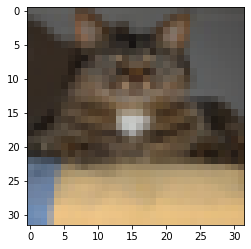

In [0]:
#checking some predictions of our model
randind = int(random.random()*1000)
plt.imshow(tinps[randind])
print(np.argmax(inzNet.predict(tinps[[randind]])))
print(np.argmax(tlabs[randind]))